In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Obtendo o dado

In [299]:
data = np.array([
    [1, 84, 46, 354],
    [2, 73, 20, 190],
    [3, 65, 52, 405],
    [4, 70, 30, 263],
    [5, 76, 57, 451],
    [6, 69, 25, 302],
    [7, 63, 28, 288],
    [8, 72, 36, 385],
    [9, 79, 57, 402],
    [10, 75, 44, 365],
    [11, 27, 24, 209],
    [12, 89, 31, 290],
    [13, 65, 52, 346],
    [14, 57, 23, 254],
    [15, 59, 60, 395],
    [16, 69, 48, 434],
    [17, 60, 34, 220],
    [18, 79, 51, 374],
    [19, 75, 50, 308],
    [20, 82, 34, 220],
    [21, 59, 46, 311],
    [22, 67, 23, 181],
    [23, 85, 37, 274],
    [24, 55, 40, 303],
    [25, 63, 30, 244]
])

In [300]:
df = pd.DataFrame(data)

In [301]:
df.head(5)

,0,1,2,3
0,1,84,46,354
1,2,73,20,190
2,3,65,52,405
3,4,70,30,263
4,5,76,57,451


In [302]:
df = df.rename(columns={1: 'Peso (Kg)', 2: 'Idade (anos)', 3: 'Taxa de Gordura no sangue'})
df.drop(columns=[0], inplace=True)

In [303]:
df.head(5)

,Peso (Kg),Idade (anos),Taxa de Gordura no sangue
0,84,46,354
1,73,20,190
2,65,52,405
3,70,30,263
4,76,57,451


### Entendendo o dado

In [304]:
df.describe()

,Peso (Kg),Idade (anos),Taxa de Gordura no sangue
count,25.000000,25.000000,25.00000
mean,68.680000,39.120000,310.72000
std,12.727005,12.248537,77.82915
min,27.000000,20.000000,181.00000
25%,63.000000,30.000000,254.00000
50%,69.000000,37.000000,303.00000
75%,76.000000,50.000000,374.00000
max,89.000000,60.000000,451.00000


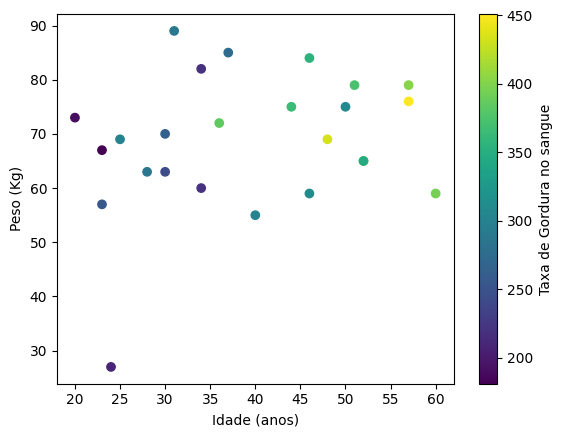

In [305]:
plt.scatter(df['Idade (anos)'], df['Peso (Kg)'], c=df['Taxa de Gordura no sangue'], cmap='viridis')
plt.xlabel('Idade (anos)')
plt.ylabel('Peso (Kg)')
plt.colorbar(label='Taxa de Gordura no sangue')
plt.show()

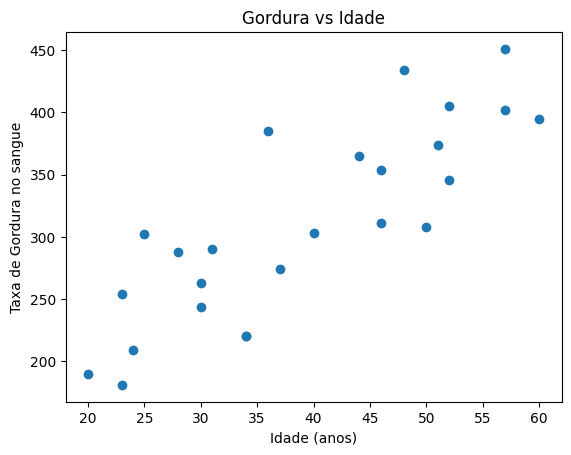

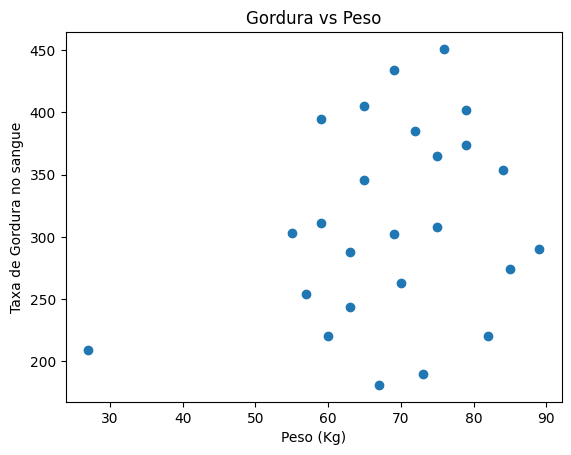

In [306]:
plt.scatter(df['Idade (anos)'], df['Taxa de Gordura no sangue'])
plt.xlabel('Idade (anos)')
plt.ylabel('Taxa de Gordura no sangue')
plt.title('Gordura vs Idade')
plt.show()

plt.scatter(df['Peso (Kg)'], df['Taxa de Gordura no sangue'])
plt.xlabel('Peso (Kg)')
plt.ylabel('Taxa de Gordura no sangue')
plt.title('Gordura vs Peso')
plt.show()


##### Como podemos analisar acima, a idade aparenta estar muito mais relacionado com a taxa de gordura do que o peso


### Ajustando o dado

In [307]:
X = df.drop('Taxa de Gordura no sangue', axis=1)
y = df['Taxa de Gordura no sangue']

print("X set shape:", X.shape)
print("y set shape:", y.shape)


X set shape: (25, 2)
y set shape: (25,)


In [308]:
X = X.to_numpy()
y = y.to_numpy()

In [309]:
X = np.insert(X, 0, 1, axis=1)
X

array([[ 1, 84, 46],
       [ 1, 73, 20],
       [ 1, 65, 52],
       [ 1, 70, 30],
       [ 1, 76, 57],
       [ 1, 69, 25],
       [ 1, 63, 28],
       [ 1, 72, 36],
       [ 1, 79, 57],
       [ 1, 75, 44],
       [ 1, 27, 24],
       [ 1, 89, 31],
       [ 1, 65, 52],
       [ 1, 57, 23],
       [ 1, 59, 60],
       [ 1, 69, 48],
       [ 1, 60, 34],
       [ 1, 79, 51],
       [ 1, 75, 50],
       [ 1, 82, 34],
       [ 1, 59, 46],
       [ 1, 67, 23],
       [ 1, 85, 37],
       [ 1, 55, 40],
       [ 1, 63, 30]])

In [403]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    
def validate_y_pred(y_test,y_pred,y_pred_EN=None,y_pred_Mom=None,title=''):
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    if y_pred_Mom is not None:
        mse = mean_squared_error(y_test, y_pred_Mom)
        r2 = r2_score(y_test, y_pred_Mom)
        mae = mean_absolute_error(y_test, y_pred_Mom)
    
    
    print("Mean squared error: %.2f" % mse)
    print('R2: %.2f' % r2) 
    print('Mean Absolute Error: %.2f' % mae)

    
    plt.figure(figsize=(20, 10))  # Defina o tamanho desejado (largura, altura)

    plt.plot(range(len(y_test)), y_test, color='blue', label='Actual')
    plt.plot(range(len(y_pred)), y_pred, color='red', label='Predicted')
    if y_pred_EN is not None and y_pred_Mom is None: plt.plot(range(len(y_pred_EN)), y_pred_EN, color='orange', label='Predicted With Inverted', linestyle='dashed')
    if y_pred_Mom is not None: plt.plot(range(len(y_pred_Mom)), y_pred_Mom, color='green', label='Predicted With Momentum', linestyle='dashed')


    for i in range(149,500,50):
        plt.axhline(y=i, color='gray', linestyle='--')

    plt.ylabel('Taxa de Gordura no sangue')
    plt.xlabel('Row Number')
    plt.title(f'Actual vs Predicted {title}')
    plt.legend()
    plt.show()
    
def get_y_pred(X,w):
    if X.shape[1] != len(w):
        X = np.insert(X, 0, 1, axis=1)
    y_pred = np.dot(X, w)
    return y_pred

### Obtendo os pesos

##### Invertendo a Matriz
Mesmo sendo uma pratica considerada ineficaz, 
vou obter os pesos primeiramente pelo metodo que inverte a matriz apenas para testar as funcoes de predicao
e assim comparar os resultados quando obter pelo gradiente descendente

In [404]:
def get_weights_inverted(X_train, y_train):
    return np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [405]:
pesos_inverted = get_weights_inverted(X, y)
pesos_inverted

array([77.98253861,  0.4173621 ,  5.21659081])

In [406]:
y_pred_inverted = get_y_pred(X,pesos_inverted)
y_pred_inverted

array([353.00413212, 212.781788  , 376.37379709, 263.69560979,
       407.04773422, 237.19529365, 250.34089349, 295.82987884,
       408.29982052, 338.81469161, 214.44949469, 276.84208048,
       376.37379709, 221.75376685, 415.60235097, 357.17688225,
       280.38835204, 377.00027567, 370.11423646, 289.57031821,
       342.57007965, 225.92738784, 306.47217694, 309.6010864 ,
       260.7740751 ])

Mean squared error: 1712.25
R2: 0.71
Mean Absolute Error: 33.09


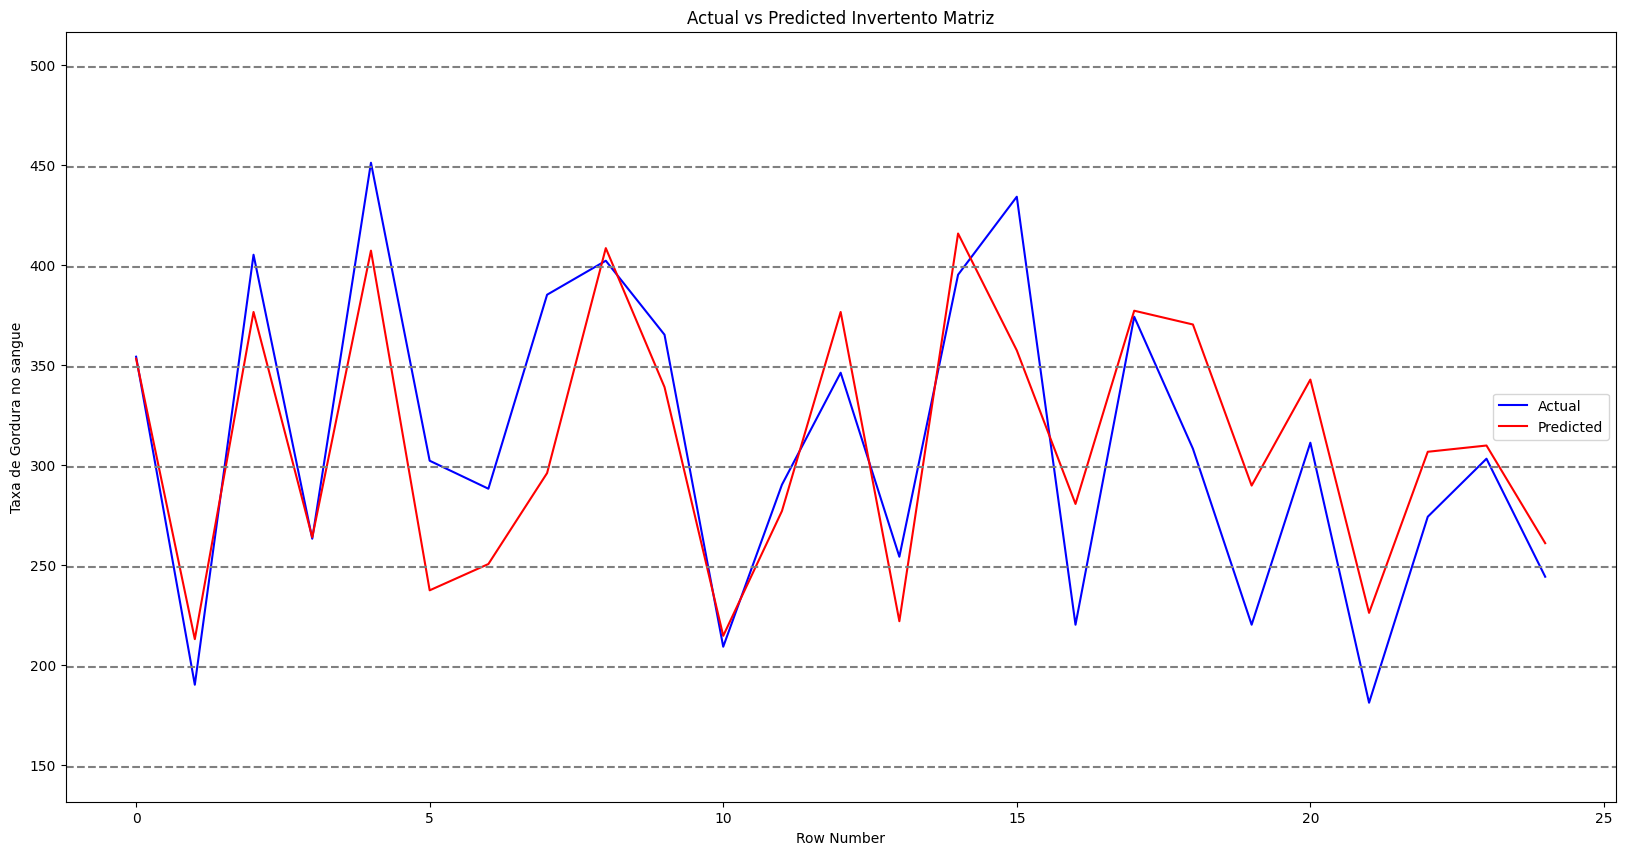

In [407]:
validate_y_pred(y,y_pred_inverted, title='Invertento Matriz')

##### Usando Gradiente Descendente

Pelo que entendi a funcao para prever o valor da taxa de gordura seria $$ \hat{y} = w_0 + w_1 \cdot \text{Peso} + w_2 \cdot \text{Idade}$$

E para encontrar os pesos usamos o $$\text{EQM} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w_0 + w_1 \cdot Peso_{i} + w_2 \cdot Idade_{i}))^2$$

E a derivada parcial de cada um dos pesos mostra como a mudanca daquele peso afeta o erro

- Derivada do EQM em relação a `w0`:
  $$ \frac{\partial \text{EQM}}{\partial w_0} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (w_0 + w_1 \cdot x_{i1} + w_2 \cdot x_{i2})) $$

- Derivada do EQM em relação a `w1`:
  $$ \frac{\partial \text{EQM}}{\partial w_1} = -\frac{2}{n} \sum_{i=1}^{n} x_{i1}(y_i - (w_0 + w_1 \cdot x_{i1} + w_2 \cdot x_{i2})) $$

- Derivada do EQM em relação a `w2`:
  $$ \frac{\partial \text{EQM}}{\partial w_2} = -\frac{2}{n} \sum_{i=1}^{n} x_{i2}(y_i - (w_0 + w_1 \cdot x_{i1} + w_2 \cdot x_{i2})) $$



In [408]:

def calcula_y_pred(X,w):
    #calcula o valor de y para um dado X e w
    return w[0] + w[1]*X[1] + w[2]*X[2]

def calcula_derivada_parcial_EQM(X,y,w,current_iter,wi,printa=True):
    #calcula a derivada parcial da função de erro quadratico médio em relação ao peso w
    #para um dado X, y e w
    if printa: print(f"i={current_iter} wi={wi}")
    wi = X[wi] if wi != 0 else 1
    somatoria = 0
    for x, yi in zip(X,y):
        somatoria +=  yi - calcula_y_pred(x,w)

    if printa:print(f"pesos={w}: erro={somatoria * (-2) / len(X)}")
    
    return somatoria * (-2) / len(X)

def calcula_pesos_com_gradiente_descendente(alpha,n_iter,me,X,y,printa=True):
    #calcula os pesos da regressão linear com gradiente descendente
    w = np.zeros(3)
    erro_total = []
    for i in range(n_iter):
        olds = w.copy()
        erro = [i]
        for j in range(3):
            deriv = calcula_derivada_parcial_EQM(X,y,w,i,j,printa)
            w[j] -= alpha * deriv
            erro.append(deriv)
        erro_total.append(erro)
        
        
        diference = 0
        for i,j in zip(olds,w):
            diference += abs(i-j)
        if diference < me:
            erro_total = np.array(erro_total)
            return w,erro_total
    if printa: print(f"---------------")
    erro_total = np.array(erro_total)
    return w,erro_total

def plot_erro(erro_total, erro_total_momentum = None,title=''):
    plt.figure(figsize=(20, 10))
    plt.axhline(y=0, color='gray', linestyle='--')
    if erro_total_momentum is None:
        plt.plot(erro_total[:, 0], erro_total[:, 1], color='yellow', label='w0')
        plt.plot(erro_total[:, 0], erro_total[:, 2], color='red', label='w1')
        plt.plot(erro_total[:, 0], erro_total[:, 3], color='orange', label='w2')
    else:
        plt.plot(erro_total[:, 0], erro_total[:, 1], color='yellow', label='w0 - Sem Momentum')
        plt.plot(erro_total[:, 0], erro_total[:, 2], color='red', label='w1 - Sem Momentum')
        plt.plot(erro_total[:, 0], erro_total[:, 3], color='orange', label='w2 - Sem Momentum')
        plt.plot(erro_total_momentum[:, 0], erro_total_momentum[:, 1], color='blue', label='w0 - Com Momentum')
        plt.plot(erro_total_momentum[:, 0], erro_total_momentum[:, 2], color='purple', label='w1 - Com Momentum')
        plt.plot(erro_total_momentum[:, 0], erro_total_momentum[:, 3], color='cyan', label='w2 - Com Momentum')
    plt.xlabel('Iteração')
    plt.ylabel('Erro')
    plt.title(f'Erro por variável por Iteração{title}')
    plt.legend()
    plt.show()
    

In [409]:
pesos_01,erro_total_01 = calcula_pesos_com_gradiente_descendente(0.01,1000,1e-9,X,y,printa=False)
pesos_001,erro_total_001 = calcula_pesos_com_gradiente_descendente(0.001,1000,1e-9,X,y)
pesos_0001,erro_total_0001 = calcula_pesos_com_gradiente_descendente(0.0001,1000,1e-9,X,y,printa=False)

i=0 wi=0
pesos=[0. 0. 0.]: erro=-621.44
i=0 wi=1
pesos=[0.62144 0.      0.     ]: erro=-620.1971200000002
i=0 wi=2
pesos=[0.62144    0.62019712 0.        ]: erro=-535.0068435968001
i=1 wi=0
pesos=[0.62144    0.62019712 0.53500684]: erro=-493.1479081537865
i=1 wi=1
pesos=[1.11458791 0.62019712 0.53500684]: erro=-492.16161233747863
i=1 wi=2
pesos=[1.11458791 1.11235873 0.53500684]: erro=-424.5582932668026
i=2 wi=0
pesos=[1.11458791 1.11235873 0.95956514]: erro=-391.3408524016081
i=2 wi=1
pesos=[1.50592876 1.11235873 0.95956514]: erro=-390.55817069680495
i=2 wi=2
pesos=[1.50592876 1.5029169  0.95956514]: erro=-336.9111003698917
i=3 wi=0
pesos=[1.50592876 1.5029169  1.29647624]: erro=-310.55117587695145
i=3 wi=1
pesos=[1.81647994 1.5029169  1.29647624]: erro=-309.93007352519754
i=3 wi=2
pesos=[1.81647994 1.81284698 1.29647624]: erro=-267.3580786257764
i=4 wi=0
pesos=[1.81647994 1.81284698 1.56383432]: erro=-246.4399825540956
i=4 wi=1
pesos=[2.06291992 1.81284698 1.56383432]: erro=-245.9471

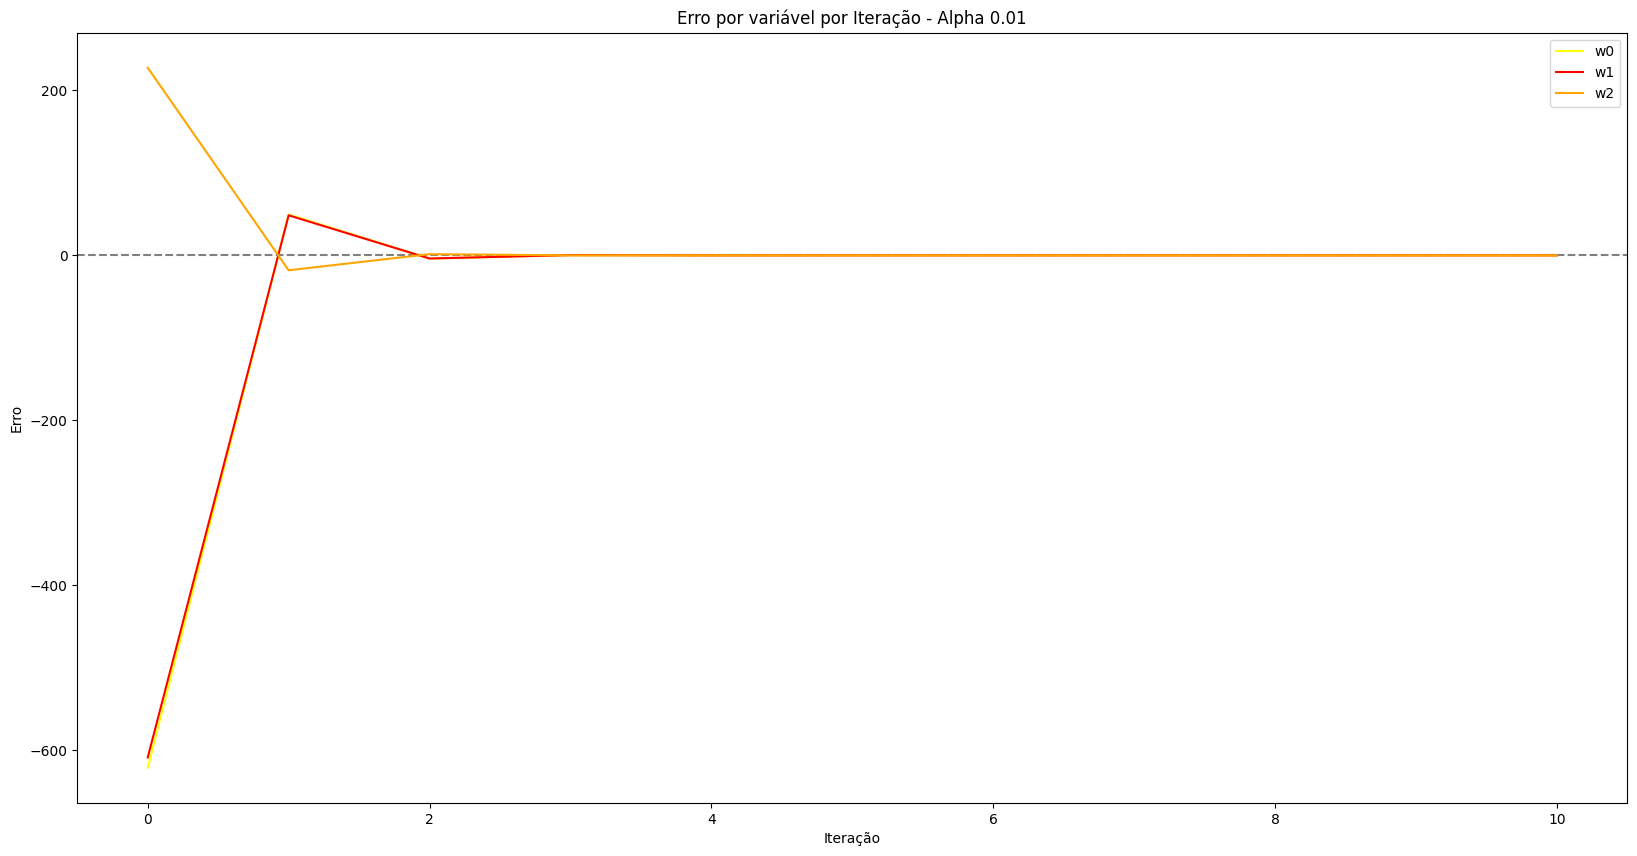

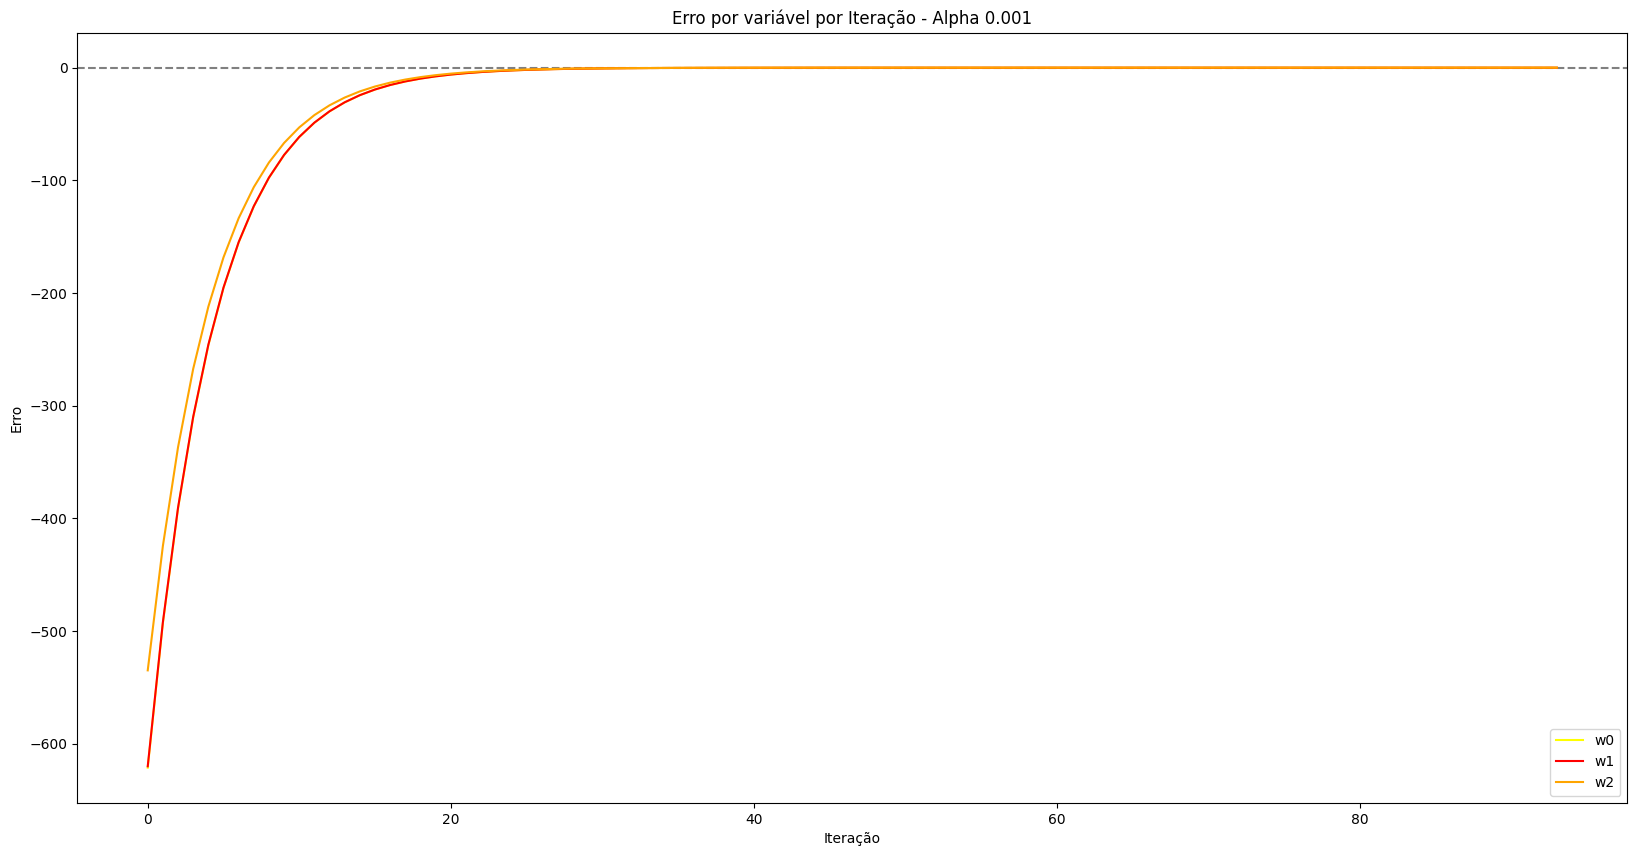

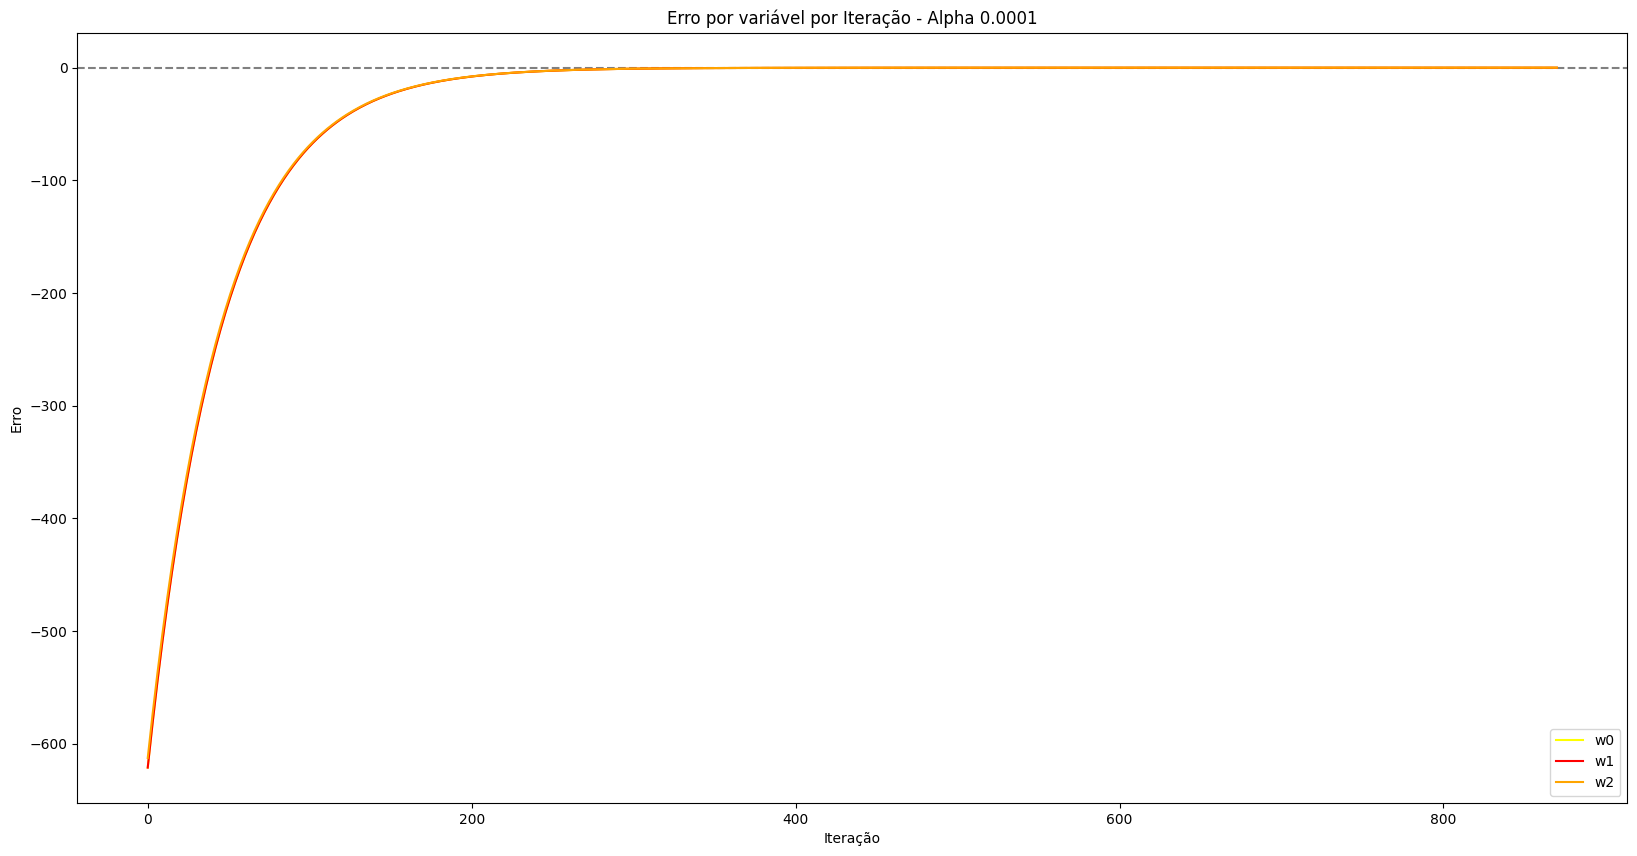

In [410]:
plot_erro(erro_total_01,title=' - Alpha 0.01')
plot_erro(erro_total_001,title=' - Alpha 0.001')
plot_erro(erro_total_0001,title=' - Alpha 0.0001')

Mean squared error: 10932.19
R2: -0.88
Mean Absolute Error: 88.48


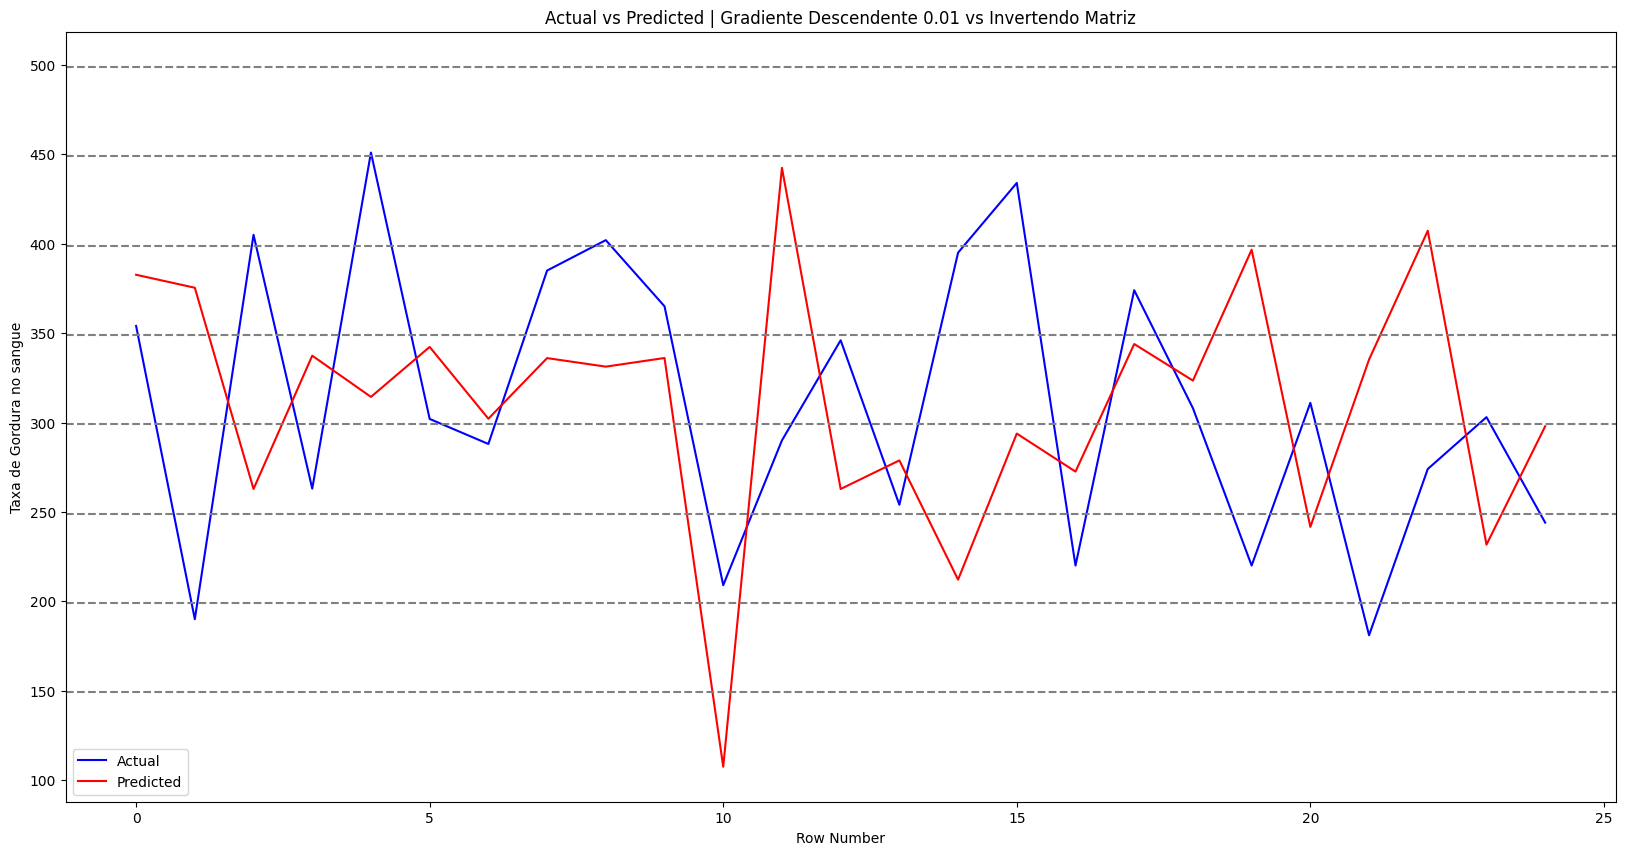

In [420]:
y_pred = get_y_pred(X,pesos_01)
validate_y_pred(y,y_pred, title='| Gradiente Descendente 0.01 vs Invertendo Matriz')

Mean squared error: 3257.45
R2: 0.44
Mean Absolute Error: 48.11


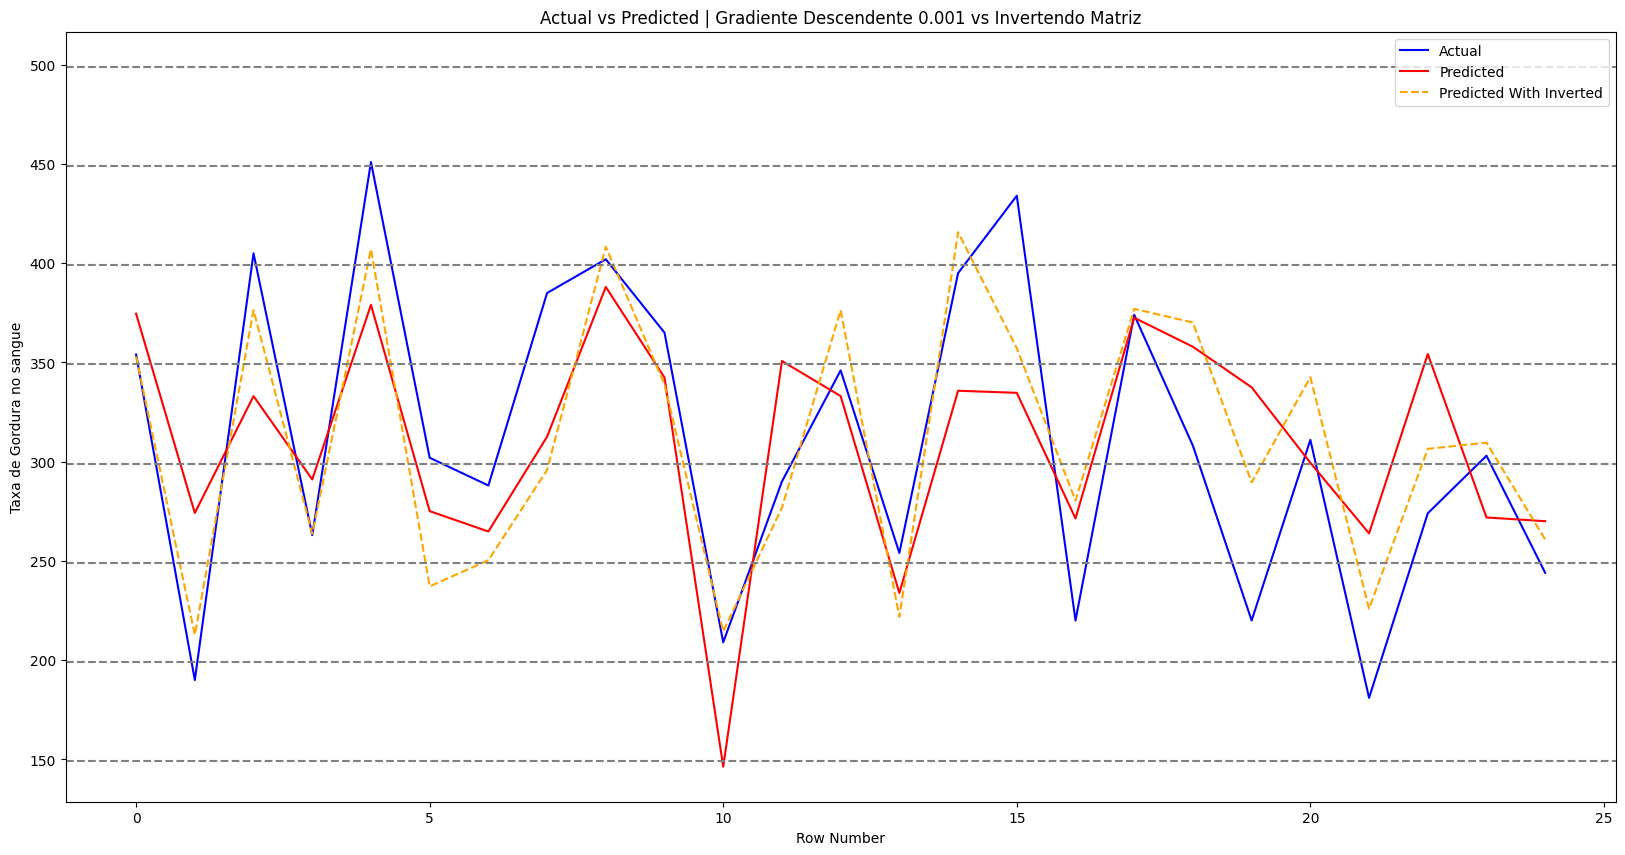

In [421]:
y_pred = get_y_pred(X,pesos_001)
validate_y_pred(y,y_pred,y_pred_inverted, title='| Gradiente Descendente 0.001 vs Invertendo Matriz')

Mean squared error: 3047.19
R2: 0.48
Mean Absolute Error: 46.38


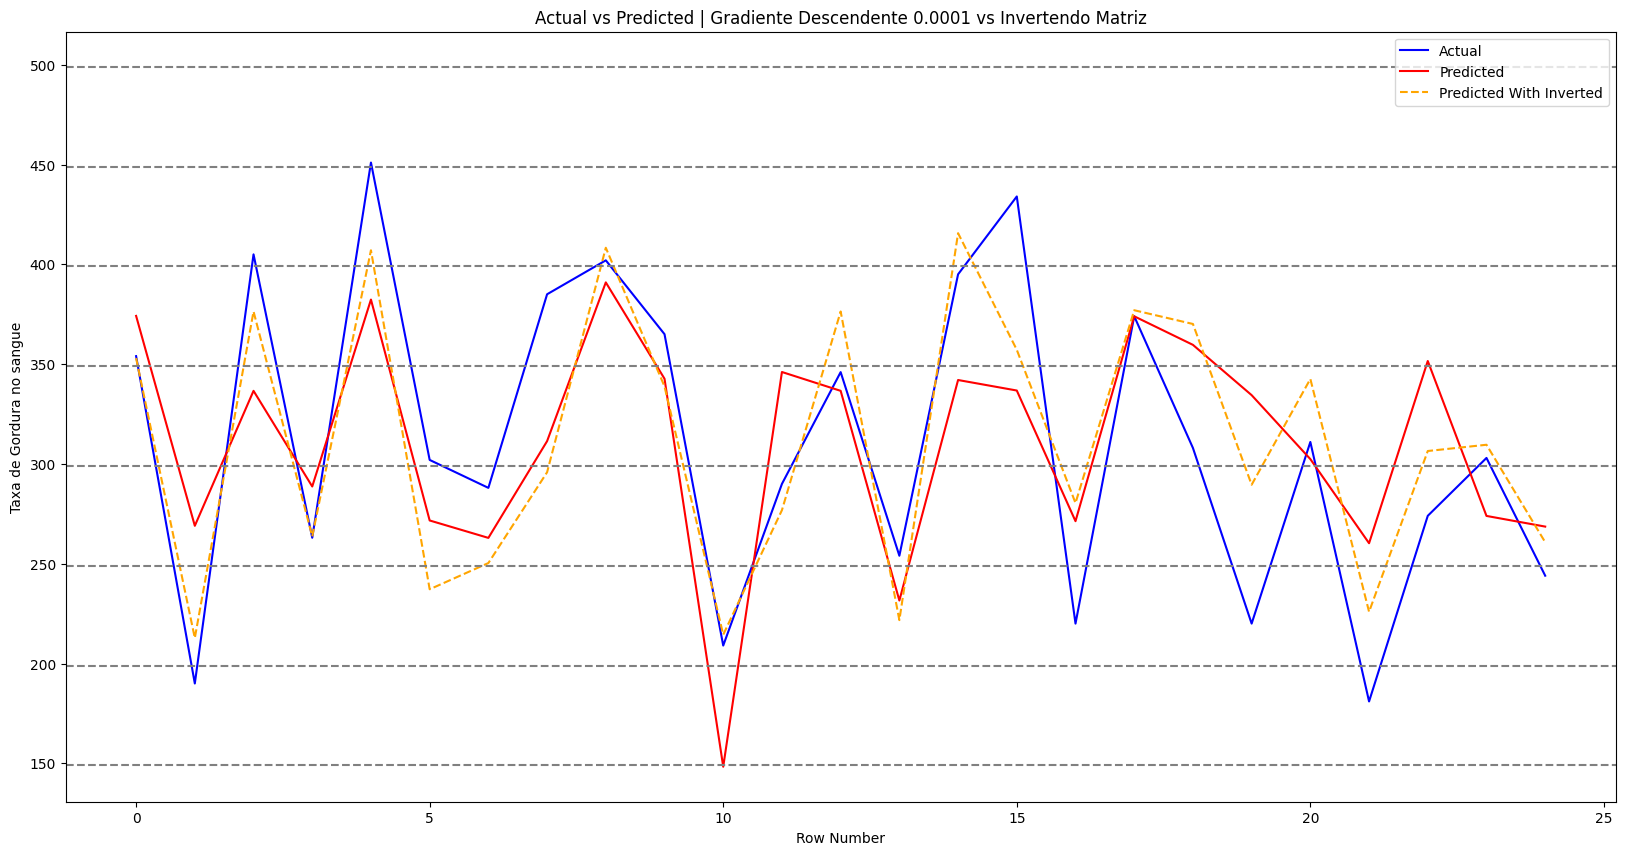

In [422]:
y_pred = get_y_pred(X,pesos_0001)
validate_y_pred(y,y_pred,y_pred_inverted, title='| Gradiente Descendente 0.0001 vs Invertendo Matriz')


#### Utilizando Momentum


In [423]:
def calcula_pesos_com_gradiente_descendente_momentum(alpha,beta,n_iter,me,X,y,printa=True):
    #calcula os pesos da regressão linear com gradiente descendente
    w = np.zeros(3)
    m = np.zeros(3)
    erro_total = []
    for iter in range(n_iter):
        olds = w.copy()
        erro = [iter]
        for j in range(3):
            deriv = calcula_derivada_parcial_EQM(X,y,w,iter,j,printa)
            m[j] = beta * m[j] - alpha * deriv
            w[j] += m[j]
            erro.append(deriv)
        erro_total.append(erro)
        diference = 0
        for i,j in zip(olds,w):
            diference += abs(i-j)
        if diference < me:
            erro_total = np.array(erro_total)
            return w, erro_total
        if printa: print(f"-------------------")
    erro_total = np.array(erro_total)
    return w, erro_total

In [424]:
pesos_momentum, erro_total_momentum_001 = calcula_pesos_com_gradiente_descendente_momentum(0.001, 0.9, 1000, 1e-9, X, y, printa=False)
pesos_momentum, erro_total_momentum_0001 = calcula_pesos_com_gradiente_descendente_momentum(0.0001, 0.9, 1000, 1e-9, X, y, printa=False)
pesos_momentum, erro_total_momentum_00001 = calcula_pesos_com_gradiente_descendente_momentum(0.00001, 0.9, 1000, 1e-9, X, y, printa=False)

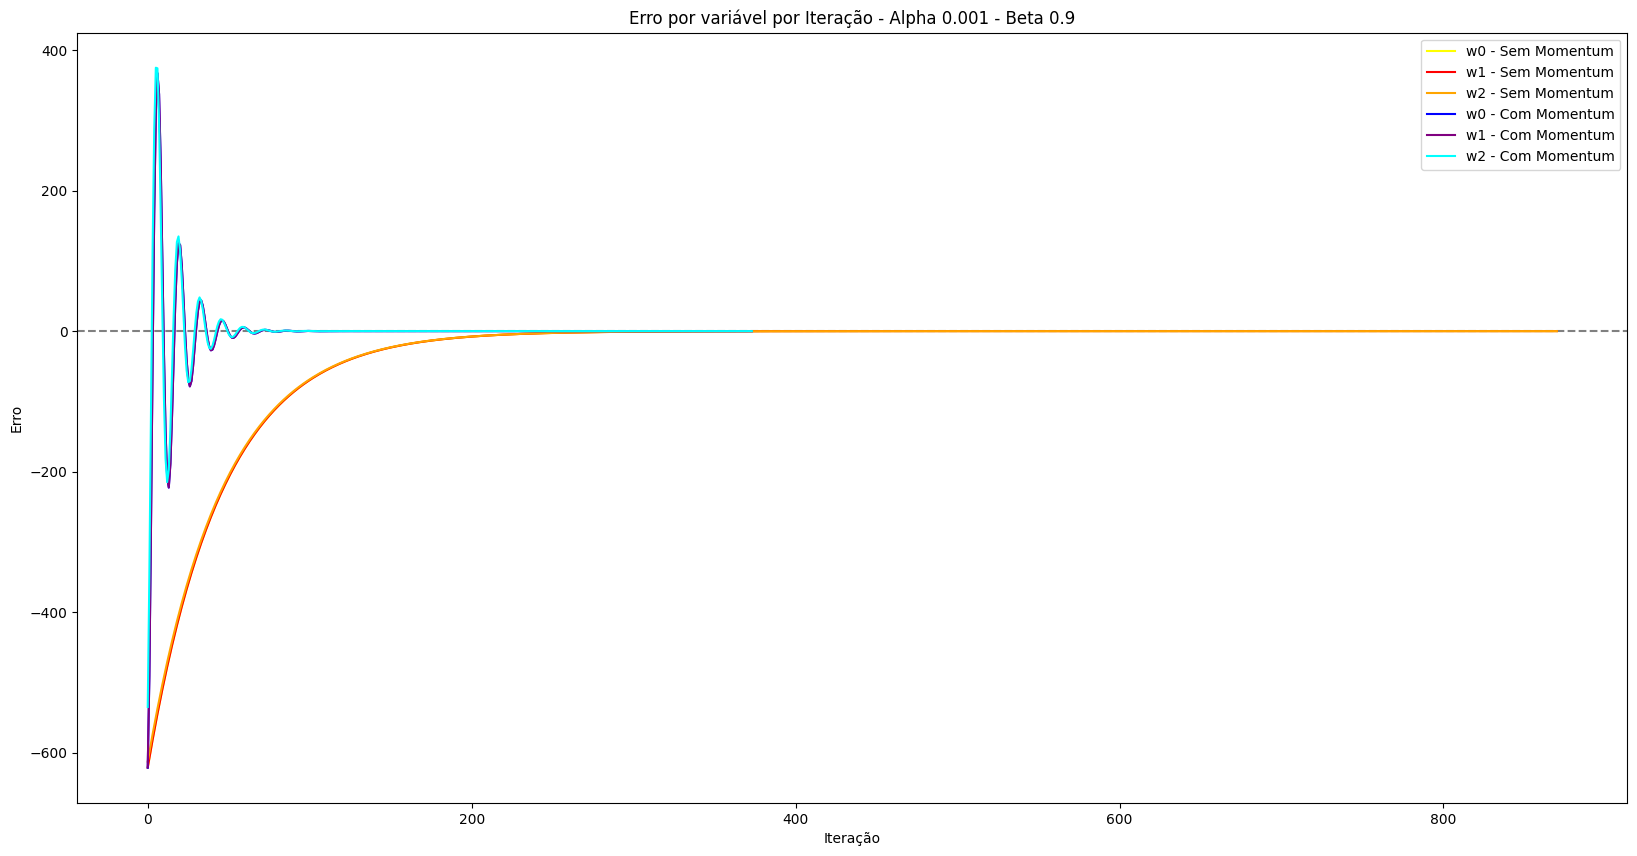

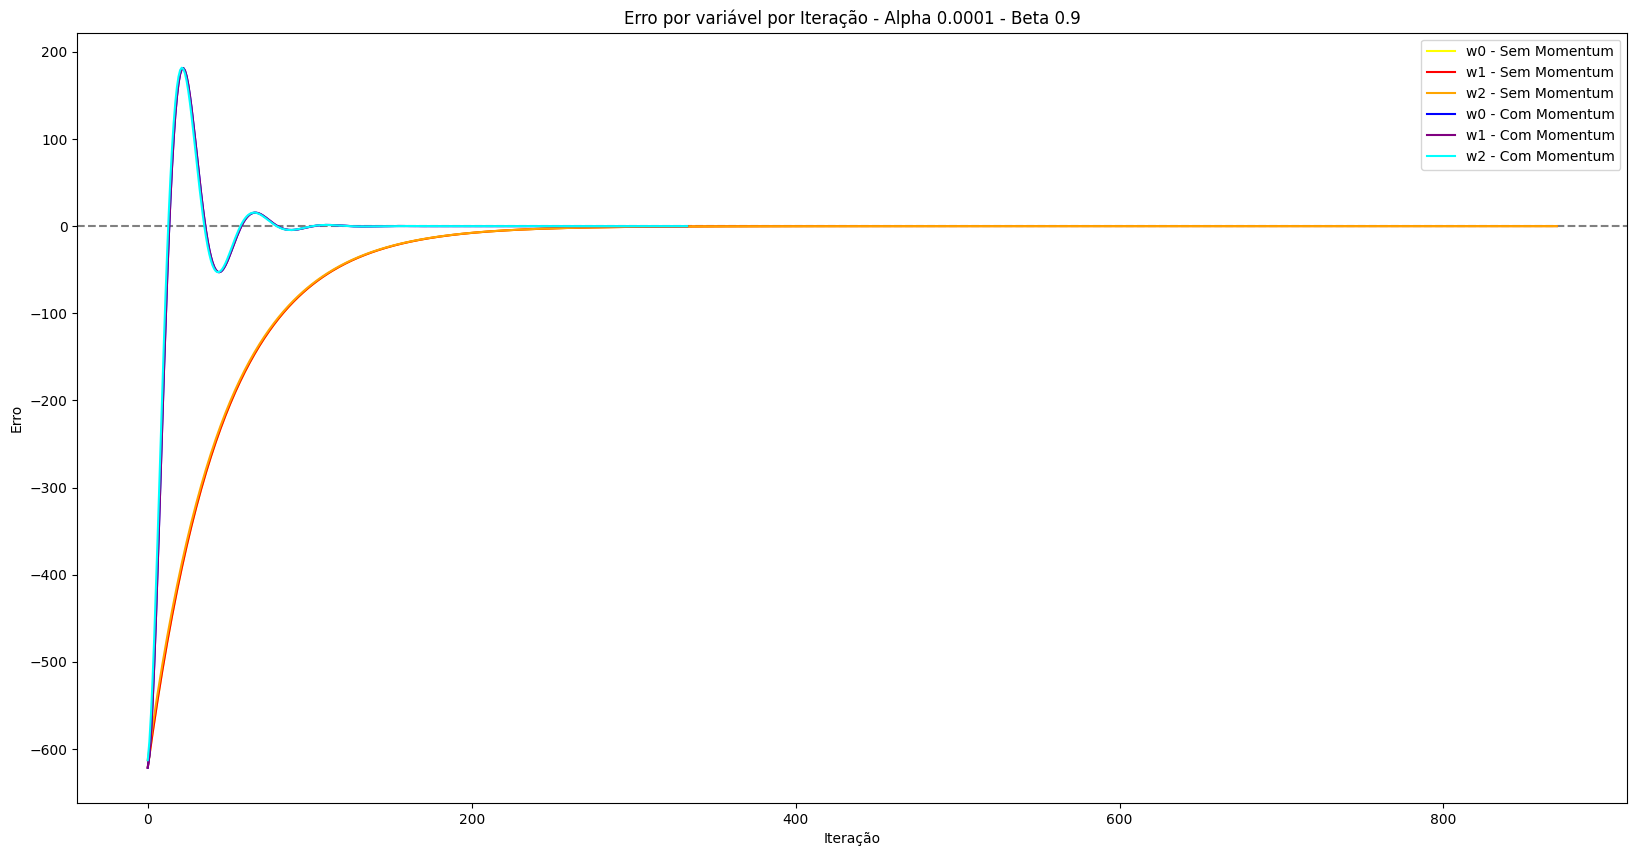

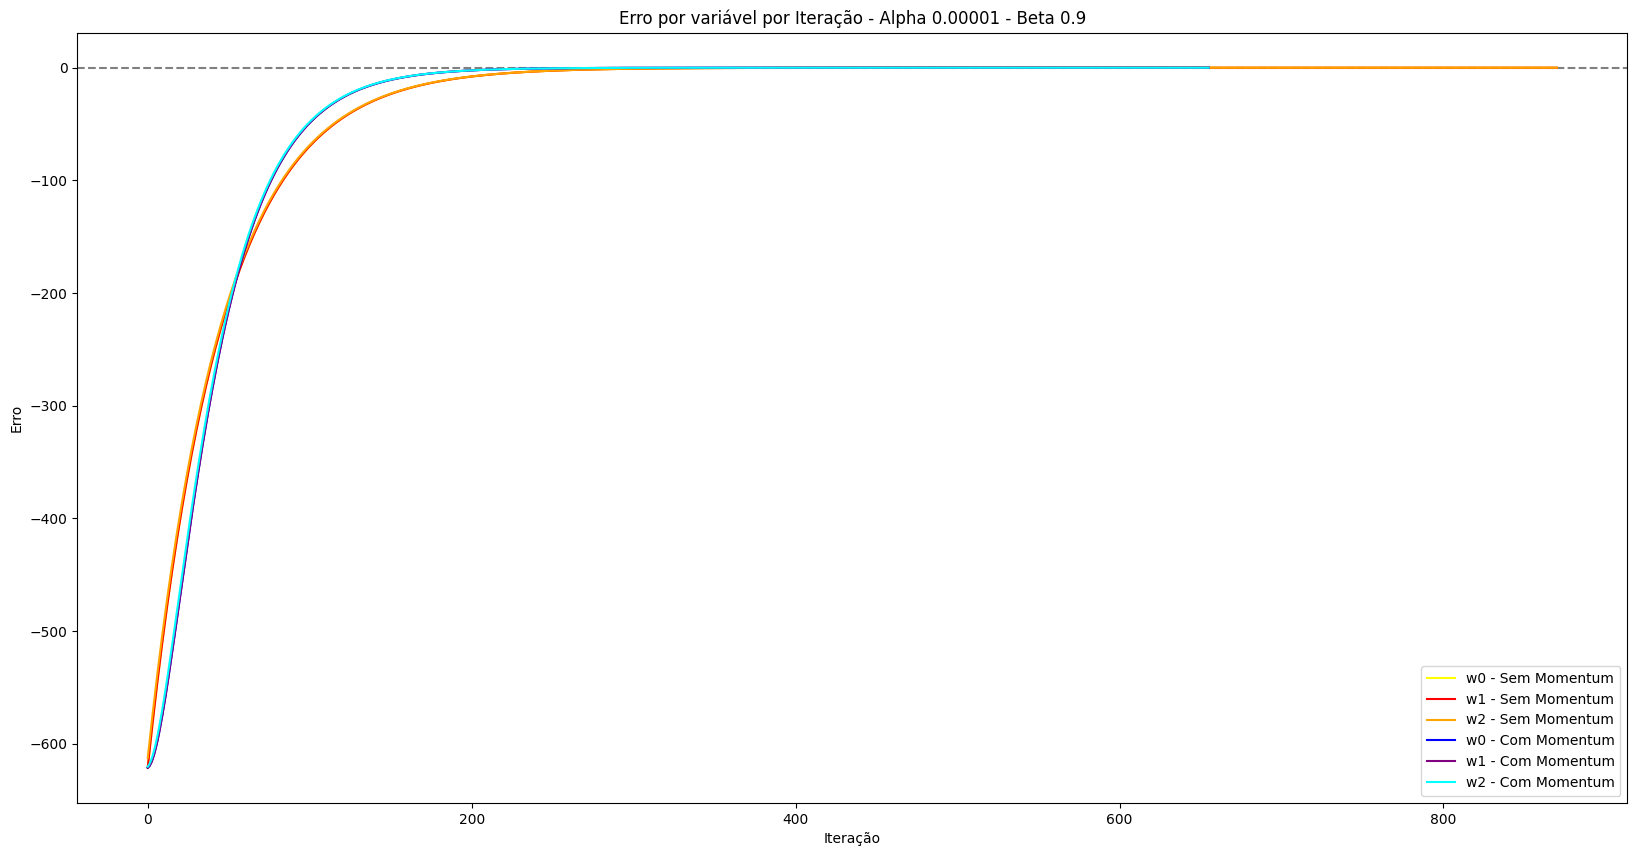

In [427]:
plot_erro(erro_total_0001, erro_total_momentum_001, title=' - Alpha 0.001 - Beta 0.9')
plot_erro(erro_total_0001, erro_total_momentum_0001, title=' - Alpha 0.0001 - Beta 0.9')
plot_erro(erro_total_0001, erro_total_momentum_00001, title=' - Alpha 0.00001 - Beta 0.9')

In [383]:
y_pred_momentum = get_y_pred(X,pesos_momentum)

Mean squared error: 3047.19
R2: 0.48
Mean Absolute Error: 46.38


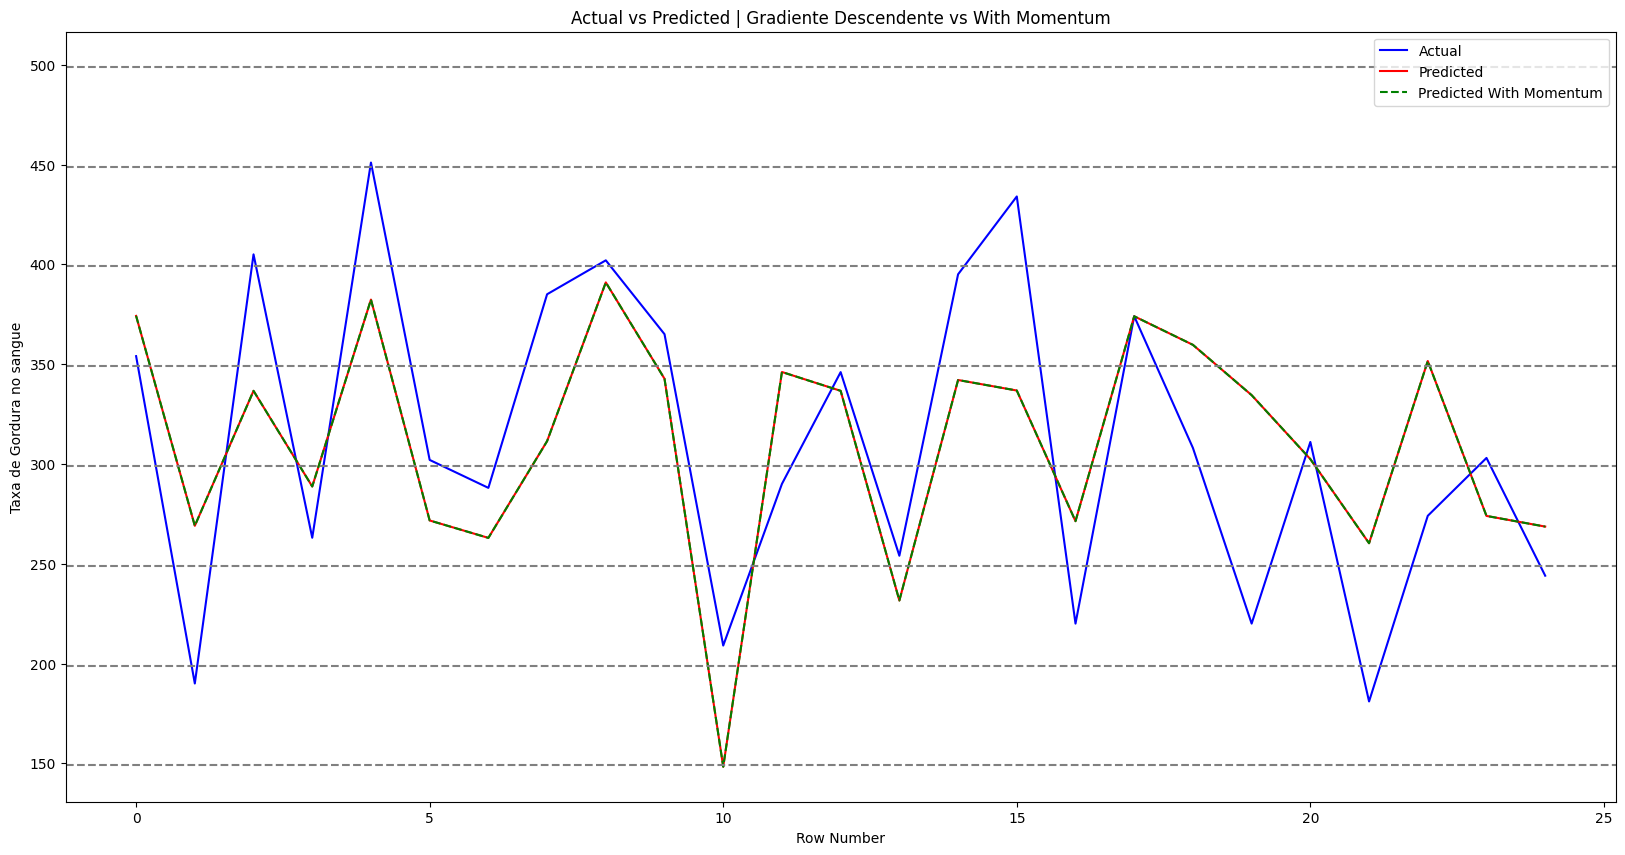

In [428]:
validate_y_pred(y,y_pred,y_pred_inverted,y_pred_momentum, title='| Gradiente Descendente vs With Momentum')

## Conclusões:

#### A primeira observação que fiz foi ao treinar os pesos com uma taxa de aprendizado de 0.01:
Com o valor de 0.01 para a taxa de aprendizado, observei um comportamento estranho: a partir de um número muito baixo de épocas, as variáveis tinham um erro muito baixo, ou pelo menos o valor da derivada parcial de cada variável era baixo o suficiente para que o código não alterasse o valor dos pesos, o que acarretou em pesos não tão precisos.
O MSE dos pesos finais do treinamento com 0.01 deu 10932.19, enquanto com 0.001 deu 3257.45.

E faz sentido o modelo com uma taxa de aprendizado menor ter um resultado melhor, o que não fez sentido foi o modelo ter achado um ponto confortável para os pesos onde não tem como melhorar os pesos, não sei se encaixa como um mínimo local, mas eu acredito que não. Pode ser apenas um erro no meu código.

#### A segunda observação foi ao comparar os resultados do método de inverter a matriz com o gradiente descendente:
Imagino que apesar de não ser viável inverter a matriz, os pesos obtidos pelo método são sempre superiores que o gradiente descendente? Ou posso obter os mesmos resultados?
Porque invertendo obtive um MSE de 1712.25, enquanto com gradiente obtive o melhor resultado de 3047.19.

Isso pode indicar que existe espaço para aprimorar a estratégia que utilizei, como uma outra taxa de aprendizado, ou então outras mudanças em hiperparâmetros, ou quem sabe seja uma limitação da técnica.

#### A terceira observação foi ao treinar o modelo com o momentum:
Ao comparar o treinamento do modelo com e sem momentum, com a mesma taxa de aprendizado pude ver a diferença dos dois métodos, e é possível notar que o modelo fica muito mais sensível ao histórico, o que é a proposta do mesmo, mas é possível visualizar como o modelo encontra uma maior dificuldade em acertar o erro.

Eu tive que utilizar uma taxa de aprendizado de 0.00001, para que tivesse um resultado próximo ao desejado, e o resultado foi que ao utilizar o momentum com 0.00001, obtive 3047.19 de MSE, o mesmo valor que o modelo sem momentum com uma taxa de 0.0001 (10x maior) então pelo que eu entendi, para compensar essa sensibilidade, é necessário diminuir um pouco mais a taxa de aprendizado.

